# Quick dive into titanic dataset

###### CRISP-DM Process

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

1. Analyzing each feature and check whether it is important in our analysis?
2. What are the most important features to estimate the death?
3. What are the top amenities people needs most?

Data Understanding：Titanic dataset consists data of 891 people . Dataset was investigated before any preprocessing.

Prepare Data: Including data cleaning, filling NAN value, one-hot encoding and MinMax preprocessing. Please refer to Preprocessing for detail.

Data Modeling: Used GridSearch with 5 folds validation to find best parameter for RandomForestClassifier. Some other models are trained and compared as well beforehand. Please refer to Training for detail.

Evaluate the Results: Result and discussion are published in https://deeplearning.art.blog/2020/05/08/quick-dive-into-titanic-dataset/ .


#### Importing all the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

####  Reading the dataset , you can download the dataset from my github repo 

In [2]:
dataset=pd.read_csv('train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


####  Doing some basic checks to get a good insight of the data

#### Here we can see that our dataset consists of 891 rows and 12 columns

In [3]:
dataset.shape

(891, 12)

#### Let us not look what columns we are having in our dataset

In [4]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Looking into the datatype of each column and check whether we need to parse any.

In [5]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Looking for null values in each column

In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Analysing distribution of each column

In [7]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Now we are ready to analyse our data

#### We will analyse our dataset taking one column at a time and looking for distinctive property if any

####  Let us start with sex of the passengers and see if it played any role

In [8]:
dataset.groupby('Sex').agg('count')['Survived']

Sex
female    314
male      577
Name: Survived, dtype: int64

#### Here we see that there were 314 females and 577 males on board

#### Now analysing among them how many survived

In [9]:
dataset.groupby('Sex').agg('sum')['Survived']

Sex
female    233
male      109
Name: Survived, dtype: int64

#### In the above block we concluded that majority of the females survived 


#### Now let us look if age will play a major role in our analysis

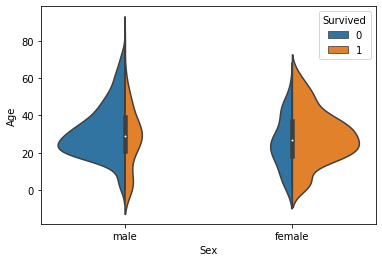

In [10]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=dataset,split=True,scale='count')

#### We infer that males aged 20-40 died majorly and female casualities were far less than male

#### Now let us see if fare was a major factor to decide whether a person will survive or not

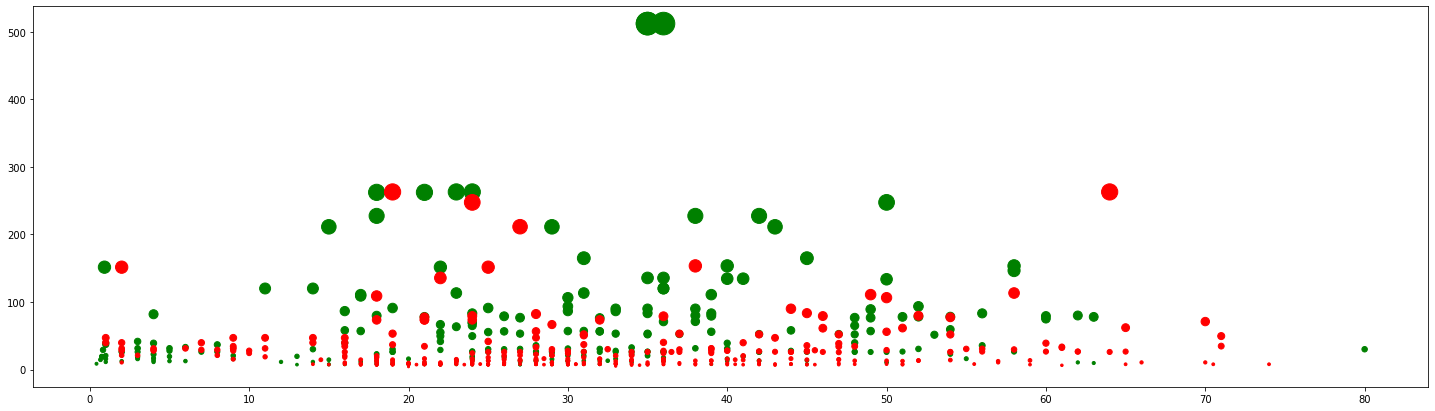

In [11]:
plt.figure(figsize=(25,7))
ax=plt.subplot()

ax.scatter(dataset[dataset['Survived']==1]['Age'],dataset[dataset['Survived']==1]['Fare'],c='green',s=dataset[dataset['Survived']==1]['Fare'])

ax.scatter(dataset[dataset['Survived']==0]['Age'],dataset[dataset['Survived']==0]['Fare'],c='red',s=dataset[dataset['Survived']==0]['Fare'])


#### We can see people with low fare died

#### Now let us see if women travelling with high fare survived or not

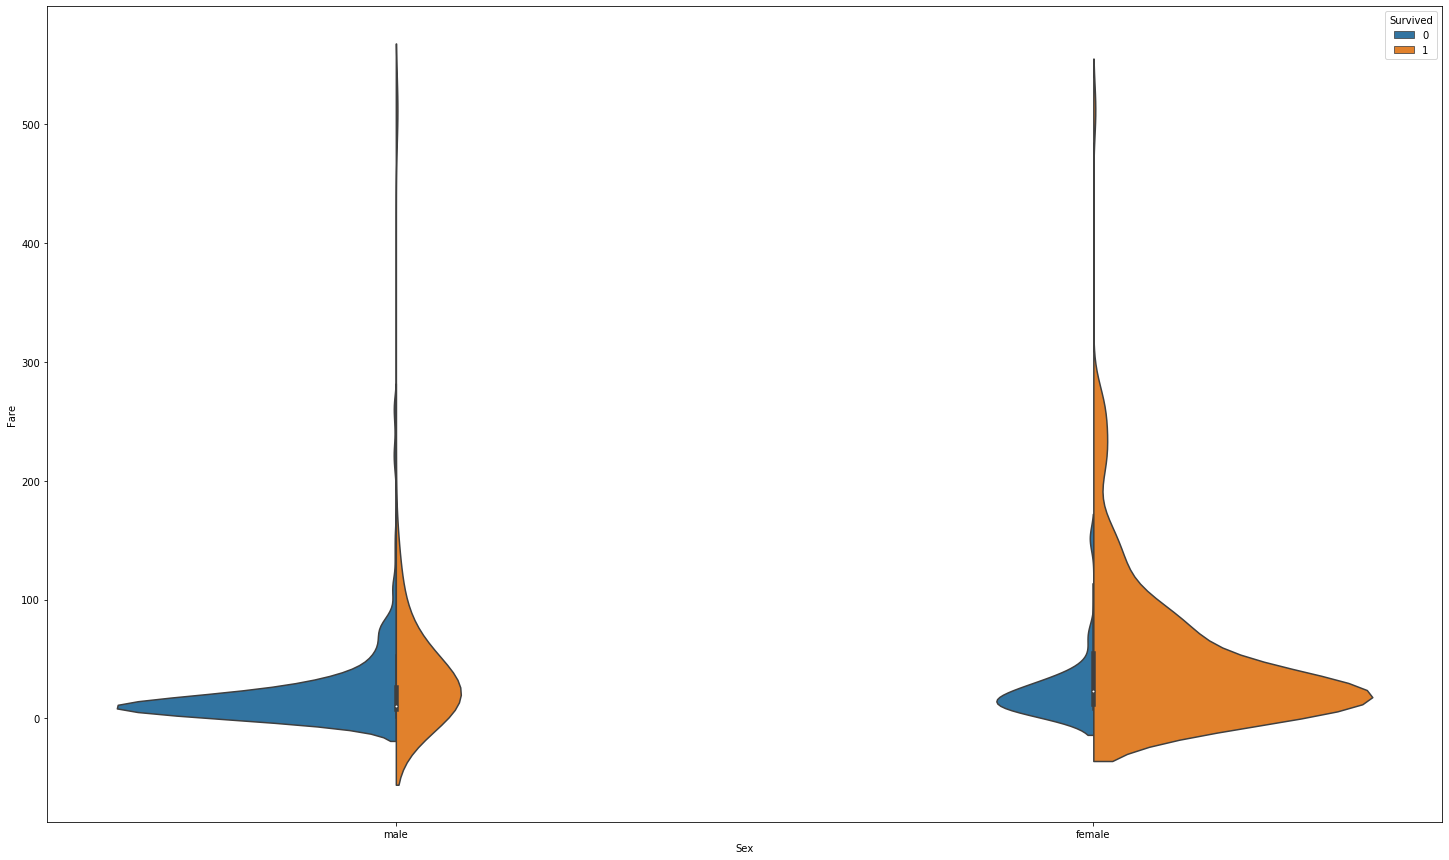

In [12]:
fig_dims = (25, 15)
fig, ax = plt.subplots(figsize=fig_dims)

sns.violinplot(x='Sex',y='Fare',hue='Survived',data=dataset,split=True,scale='count',ax=ax)

#### Here we see no such results

#### Let us now analyse other columns
Let us now see embarked

In [13]:
dataset.groupby('Embarked').agg('count')['Survived']

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

In [14]:
dataset.groupby('Embarked').agg('sum')['Survived']

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

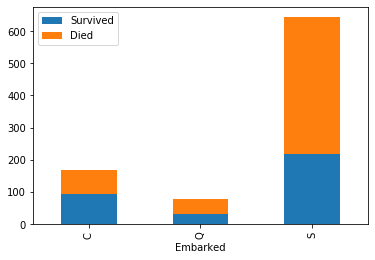

In [15]:
dataset['Died']=dataset['Survived'].map(lambda s: 0 if s==1 else 1)
dataset.groupby('Embarked').agg('sum')[['Survived','Died']].plot(kind='bar',stacked=True)


#### We see that more than 50% people on 'C' survived

#### Let us now look at the columns which determined family size and structure

In [16]:
dataset.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [17]:
dataset.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

#### Now we will explore 'parch' and  'SibSp'  columns

In [18]:
dataset['Family_Size']=dataset['Parch']+dataset['SibSp']+1
sorted(dataset['Family_Size'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 11]

In [19]:
def process_family():
    global dataset
        
    #introducing features based on family size
    dataset['Singleton']=dataset['Family_Size'].map(lambda s:1 if s==1 else 0)
    dataset['Small_Family']=dataset['Family_Size'].map(lambda s:1 if  s>1 and s<=5 else 0)
    dataset['Large_Family']=dataset['Family_Size'].map(lambda s:1 if s>5 else 0)
    dataset.drop(['Parch','SibSp'],axis=1,inplace=True)
    

In [20]:
process_family()
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Died,Family_Size,Singleton,Small_Family,Large_Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,2,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,0,2,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,0,2,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1,1,1,0,0


In [21]:
len(dataset.Ticket.unique())

681

In [22]:
dataset.groupby('Pclass').agg('sum')['Survived']

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [23]:
def process_embark():
    global dataset
    dataset.Embarked.fillna('S',inplace=True)
    pd_dummies=pd.get_dummies(dataset['Embarked'],prefix='Embarked')
    dataset=pd.concat([dataset,pd_dummies],axis=1)
    dataset.drop('Embarked',axis=1,inplace=True)
    return dataset

In [24]:
process_embark();
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Died,Family_Size,Singleton,Small_Family,Large_Family,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,1,2,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,0,2,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,0,1,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,0,2,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NaN,1,1,1,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,B42,0,1,1,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.4500,NaN,1,4,0,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C148,0,1,1,0,0,1,0,0


In [25]:
def process_cabin():
    global dataset
    dataset.Cabin.fillna('T',inplace=True)
    dataset['Cabin']=dataset['Cabin'].map(lambda c:c[0])
    pd_dummies=pd.get_dummies(dataset['Cabin'],prefix='Cabin')
    dataset=pd.concat([dataset,pd_dummies],axis=1)
    dataset.drop('Cabin',axis=1,inplace=True)
    return dataset

In [26]:
process_cabin();
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Died,Family_Size,...,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,1,2,...,0,1,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,0,2,...,0,0,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,0,2,...,0,1,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,1,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,1,1,...,0,1,0,0,0,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,0,1,...,0,1,0,1,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.4500,1,4,...,0,1,0,0,0,0,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,0,1,...,0,0,0,0,1,0,0,0,0,0


#### Extracting title from names to check if the model performance will get affected

In [27]:
dataset.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [28]:
titles=set()
for name in dataset['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [29]:
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [30]:
Title_Dictionary={
    "Capt":"Officer",
    "Col":"Officer",
    "Don":"Royalty",
    "Dr":"Officer",
    "Jonkheer":"Royalty",
    "Lady":"Royalty",
    "Major":"Officer",
    "Master":"Master",
    'Miss':"Miss",
    'Mlle':"Miss",
    'Mme':"Mrs",
    'Mr':"Mr",
    'Mrs':"Mrs",
    'Ms':"Miss",
    'Rev':"Officer",
    'Sir':"Master",
    'the Countess':"Royalty"
}

In [31]:
def get_titles():
    dataset["Title"]=dataset['Name'].map(lambda a:a.split(',')[1].split('.')[0].strip())
    
    dataset['Title']=dataset.Title.map(Title_Dictionary)
    
    return dataset

In [32]:
dataset=get_titles()
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Died,Family_Size,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,1,2,...,1,0,0,0,0,0,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,0,2,...,0,0,0,1,0,0,0,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,0,1,...,1,0,0,0,0,0,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,0,2,...,1,0,0,1,0,0,0,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,1,1,...,1,0,0,0,0,0,0,0,1,Mr


In [33]:
dataset.drop('Name',axis=1,inplace=True)
title_dummy=pd.get_dummies(dataset['Title'],prefix='Title')
dataset=pd.concat([dataset,title_dummy],axis=1)
dataset.drop('Title',axis=1,inplace=True)



In [35]:
a=dataset.Age.mean()
dataset['Age'].fillna(a,inplace=True)

In [36]:
dataset.head()
dataset.drop(['Died'],axis=1,inplace=True)


In [37]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Family_Size,Singleton,Small_Family,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,0,3,male,22.0,A/5 21171,7.2500,2,0,1,...,0,0,0,1,0,0,1,0,0,0
1,2,1,1,female,38.0,PC 17599,71.2833,2,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,1,1,0,...,0,0,0,1,0,1,0,0,0,0
3,4,1,1,female,35.0,113803,53.1000,2,0,1,...,0,0,0,0,0,0,0,1,0,0
4,5,0,3,male,35.0,373450,8.0500,1,1,0,...,0,0,0,1,0,0,1,0,0,0


In [38]:
title_dummy=pd.get_dummies(dataset['Sex'],prefix='Sex')
dataset=pd.concat([dataset,title_dummy],axis=1)
dataset.drop('Sex',axis=1,inplace=True)

In [39]:
y=dataset.Survived.to_numpy()
dataset.drop(['Survived','Ticket'],axis=1,inplace=True)
X=dataset

#### Splitting dataset for model performance evaluation

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((801, 27), (90, 27), (801,), (90,))

In [42]:
#dataset.drop(['Ticket'],axis=1,inplace=True)

#### Using Random Forest for building the model
The hyperparameters were choosen after performing GridSearch

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=180,min_samples_leaf=3,max_features=0.5,n_jobs=-1)
classifier.fit(X_train,y_train)
classifier.score(X_train,y_train)


0.9176029962546817

We got an accuracy of 91.7%

In [45]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
cr=classification_report(y_pred,y_test)

confusion_matrix(y_pred,y_test)

array([[45,  7],
       [ 9, 29]], dtype=int64)